<a href="https://colab.research.google.com/github/RobertPhamDA/A-B_testing_project/blob/main/A_B_testing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
You have been assigned to be part of the newly created Business Analytics Team at Alma-Cafe, tasked with improving business performance through the detailed analysis of the data that the company is generating. This task force reports directly to the CEO, as the board of directors has decided to put all digitalization efforts at the center of their corporate strategy with the objective of adapting the company to the new data-driven market.


The company has been operating consistently over the past 3 months, showing a healthy business outcome. One of the most important departments in the company is the Product Procurement Department. This department implemented a pilot project last month and is interested in evaluating the performance of the project to determine if a larger scale project should be put in place.


The Product Procurement Department oversees purchasing all coffee products, with a focus on obtaining the highest quality in products to satisfy the needs of the companies’ premium clientele. The most important product they acquire are the coffee beans from South American providers and that are used for making the coffee at each location.


With the intention of improving sales, the Procurement Department decided to partner with a Quality Certification company in Brazil called Bracof. This company claims to have a Quality Assurance process that guarantees a high-quality selection among the many coffee producers that can be found in the country. Early focus groups showed that customers might be willing to increase their daily coffee purchases with this premium coffee. In August, all Brazilian coffee was replaced by the premium mix provided by Bracof. The manager wants to know if the new coffee mix has in fact increased purchases, as there might be the possibility of seeking a similar strategy for imports from Colombia and Peru. 

#import_input

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st
import plotly.express as px
from scipy import stats
from datetime import datetime
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#df0 contains the data before the implementation
df0 = pd.read_csv('/content/gdrive/MyDrive/data_for_learning_stat/prior.csv', sep=',')

#df1 contains the data before the implementation
df1 = pd.read_csv('/content/gdrive/MyDrive/data_for_learning_stat/after.csv', sep=',')

In [ ]:
df0.head()

,Date,product_origin,city,week_day,servings
0,01/05/2022,Brazil,Downtown,Sunday,1081
1,01/05/2022,Colombia,Downtown,Sunday,1173
2,01/05/2022,Peru,Downtown,Sunday,915
3,01/05/2022,Brazil,North Vancouver,Sunday,578
4,01/05/2022,Colombia,North Vancouver,Sunday,706


In [ ]:
df1.head()

,Date,product_origin,city,week_day,servings
0,01/08/2022,Brazil,Downtown,Monday,927
1,01/08/2022,Colombia,Downtown,Monday,1025
2,01/08/2022,Peru,Downtown,Monday,830
3,01/08/2022,Brazil,North Vancouver,Monday,580
4,01/08/2022,Colombia,North Vancouver,Monday,589


#cleansing_data

In [ ]:
df0.isnull().sum()/len(df0)

Date              0.0
product_origin    0.0
city              0.0
week_day          0.0
servings          0.0
dtype: float64

In [ ]:
df1.isnull().sum()/len(df1)

Date              0.0
product_origin    0.0
city              0.0
week_day          0.0
servings          0.0
dtype: float64

In [ ]:
df0 = df0.rename(columns={'Date':'date','product_origin':'product_origin','city':'city','week_day':'week_day','servings':'servings'})

In [ ]:
df1 = df1.rename(columns={'Date':'date','product_origin':'product_origin','city':'city','week_day':'week_day','servings':'servings'})

In [ ]:
df0.city = df0.city.str.replace(' ','_')

In [ ]:
df1.city = df1.city.str.replace(' ','_')

In [ ]:
df1.dtypes

date              object
product_origin    object
city              object
week_day          object
servings           int64
dtype: object

In [ ]:
df0.dtypes

date              object
product_origin    object
city              object
week_day          object
servings           int64
dtype: object

In [ ]:
df0.date = pd.to_datetime(df0.date,format='%d/%m/%Y', errors='coerce')

In [ ]:
df1.date = pd.to_datetime(df1.date,format='%d/%m/%Y', errors='coerce')

#answering_question

1. What is the mean and standard deviation for the servings of Brazilian Coffee prior to the implementation of the Pilot?

In [ ]:
df0[df0.product_origin=='Brazil'].describe()

,servings
count,460.000000
mean,441.036957
std,262.912224
min,115.000000
25%,254.000000
50%,335.000000
75%,562.250000
max,1209.000000


we can see before the implementation 
mean value is 441.03 
and standard deviation is 262.91

2. What is the mean for the servings of Brazilian Coffee after the implementation of the Pilot?

In [ ]:
df1[df1.product_origin=='Brazil'].servings.mean()

481.6360655737705

we can see after the implementation mean value is 481.63

3. How many data entries are for all Brazilian Coffee servings after the implementation? Keep in mind that the dataset contains entries from multiple locations.

---



In [ ]:
df1[df1.product_origin=='Brazil'].date.count()

305

There are totally 305 entries for all Brazilian coffee servings after implementation

In [ ]:
df0[df0.product_origin=='Brazil'].date.count()

460

#conducting_t-test

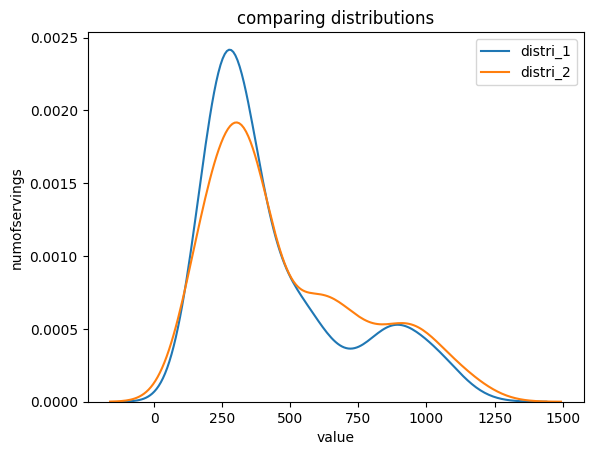

In [ ]:
distribution1 = df0[df0.product_origin=='Brazil'].servings
distribution2 = df1[df1.product_origin=='Brazil'].servings

sns.kdeplot(distribution1, label='distri_1')
sns.kdeplot(distribution2, label='distri_2')

plt.legend()
plt.xlabel('value')
plt.ylabel('numofservings')
plt.title('comparing distributions')
plt.show()

In [ ]:
t_statistic, p_value = stats.ttest_ind(distribution1, distribution2)

print("T-Statistic:", t_statistic)
print("p-value", p_value)

if p_value > 0.05:
  print("Accept null hypothesis")
else:
  print("Reject null hypothesis")

T-Statistic: -2.0387743626835833
p-value 0.041816757383484365
Reject null hypothesis


What is the probability of obtaining these values assuming that the Pilot had no
effect?

==> the probability assuming that the pilot had no effect is 4,18%.

Can we conclude that the Pilot had a positive effect on daily servings?

Yes, because through the t-test we can see the pilot help servings in Brazil increasing significantly.

#exploring_data

In [ ]:
df0.head()

,date,product_origin,city,week_day,servings
0,2022-05-01,Brazil,Downtown,Sunday,1081
1,2022-05-01,Colombia,Downtown,Sunday,1173
2,2022-05-01,Peru,Downtown,Sunday,915
3,2022-05-01,Brazil,North_Vancouver,Sunday,578
4,2022-05-01,Colombia,North_Vancouver,Sunday,706


In [42]:
#find out week day that having highest volumn
px.line(df0.groupby(['product_origin','week_day'],as_index=False).servings.sum(),x='week_day',y='servings',color='product_origin',title='volumns of servings by week day')

Text(0.5, 1.0, 'servings by city')

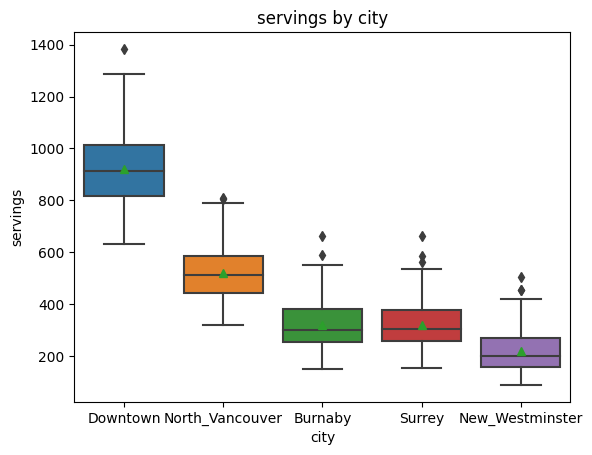

In [62]:
sns.boxplot(data=df0,x='city',y='servings',showmeans=True)
plt.title('servings by city')

Text(0.5, 1.0, 'servings by product_origin')

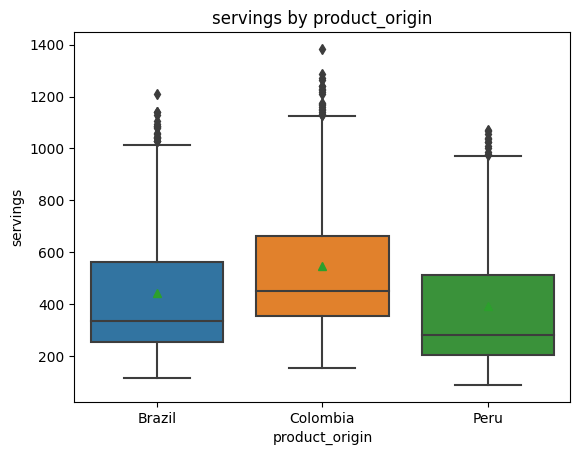

In [64]:
sns.boxplot(data=df0, x='product_origin', y='servings',showmeans=True)
plt.title('servings by product_origin')

In [66]:
#find out range day before implement
df0.date.agg({'min','max',lambda x: x.max()-x.min()})

max         2022-07-31 00:00:00
min         2022-05-01 00:00:00
<lambda>       91 days 00:00:00
Name: date, dtype: object

In [67]:
#find out range day after implement
df1.date.agg({'min','max',lambda x: x.max()-x.min()})

max         2022-09-30 00:00:00
min         2022-08-01 00:00:00
<lambda>       60 days 00:00:00
Name: date, dtype: object

In [58]:
sample = random.sample(df1[df1.product_origin=='Brazil'].servings.to_list(),10)

In [59]:
num_samples = 1000 
sample_size = 30  
means1 = [] 
for _ in range(num_samples):
    sample = np.random.choice(df0[df0.product_origin=='Brazil'].servings, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    means1.append(sample_mean)

In [60]:
num_samples = 1000 
sample_size = 30  
means2 = [] 
for _ in range(num_samples):
    sample = np.random.choice(df1[df1.product_origin=='Brazil'].servings, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    means2.append(sample_mean)

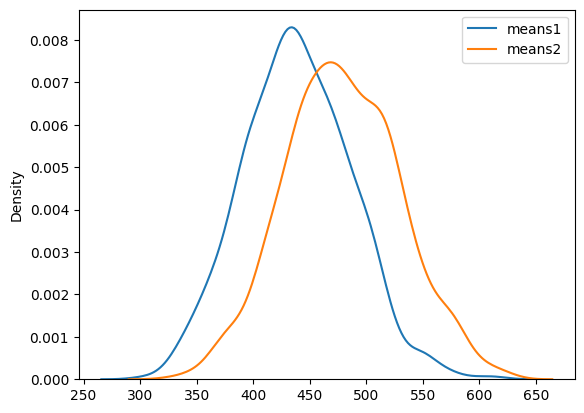

In [61]:
sns.kdeplot(means1,label='means1')
sns.kdeplot(means2,label='means2')
plt.legend()
plt.show()

In [44]:
df0[df0.product_origin=='Brazil'].servings.mean()

441.0369565217391

In [43]:
df1[df1.product_origin=='Brazil'].servings.mean()

481.6360655737705